The datasets provided have the following columns of data:

species_info.csv:

    category - class of animal
    scientific_name - the scientific name of each species
    common_name - the common names of each species
    conservation_status - each species’ current conservation status

observations.csv:

    scientific_name - the scientific name of each species
    park_name - Park where species were found
    observations - the number of times each species was observed at park


# Scoping

### Tasks

    1. What is the distribution of conservation_status for animals?
    2. Are certain types of species more likely to be endangered?
    3. Are the differences between species and their conservation status significant?
    4. Which species were spotted the most at each park?


# Exploratory Data Analysis

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the datasets
obs = pd.read_csv("/home/cacaprog/learning-projects/biodiversity/observations.csv")

# print the first few rows of the DataFrame
print(obs.head(5))

# print the DataFrame's shape
print(obs.shape)

# print the DataFrame's data types
print(obs.dtypes)

# check for missing values
print(obs.isnull().sum())


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
(23296, 3)
scientific_name    object
park_name          object
observations        int64
dtype: object
scientific_name    0
park_name          0
observations       0
dtype: int64


In [3]:
obs.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


There is no missing value in observations data frame

In [4]:
# Have duplicated data?

obs.duplicated().value_counts()

False    23281
True        15
dtype: int64

@Maryam, we have duplicated data here.
Let´s check if the duplicated data is on 'scientific_name'

@Cairo, that was so smart

In [5]:
# Check for duplicate data

obs[obs.duplicated(subset=['scientific_name', 'park_name'])]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


In [6]:
obs[obs.scientific_name == 'Penstemon procerus']

,scientific_name,park_name,observations
55,Penstemon procerus,Great Smoky Mountains National Park,67
211,Penstemon procerus,Yellowstone National Park,215
2334,Penstemon procerus,Bryce National Park,98
16876,Penstemon procerus,Yosemite National Park,121


Duplicated scientific name. It´s not good. But the same specie was found in different parks.

In [7]:
# Calculate the total observations for duplicate records and then remove the duplicates
obs['total'] = obs.groupby(['scientific_name', 'park_name'])['observations'].transform('sum')
obs.drop_duplicates(subset=['scientific_name', 'park_name'], keep='last', inplace=True)
obs = obs[['scientific_name', 'park_name', 'total']]
obs = obs.rename(columns={'total': 'observations'})
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


Let's do the same on spec dataframe

In [8]:
# load the datasets
spec = pd.read_csv("/home/cacaprog/learning-projects/biodiversity/species_info.csv")
# print the first few rows of the DataFrame
print(spec.head(5))

# print the DataFrame's shape
print(spec.shape)

# print the DataFrame's data types
print(spec.dtypes)

# check for missing values
print(spec.isnull().sum())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
(5824, 4)
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


There is no missing value in spieces_info data frame

In [9]:
spec.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [10]:
# Have duplicated data?

spec.duplicated().value_counts()


False    5824
dtype: int64

Let's check further, inside dataset

In [11]:
spec[spec.duplicated(subset=['scientific_name'])]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


In [12]:
spec[spec.scientific_name == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


Let's drop the duplicate

In [13]:
spec.drop_duplicates(subset=['scientific_name'], keep='last', inplace=True)

In [14]:
spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  179 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB


### 1. What is the distribution of conservation_status for animals?


In [15]:
spec.conservation_status.value_counts()

Species of Concern    151
Endangered             15
Threatened             10
In Recovery             3
Name: conservation_status, dtype: int64

In [16]:
spec.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

Animals = Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant, Nonvascular Plant

In [17]:
spec.category.head()

0    Mammal
1    Mammal
2    Mammal
3    Mammal
7    Mammal
Name: category, dtype: object

In [18]:
spec[['scientific_name', 'conservation_status']].groupby('conservation_status').count()

,scientific_name
conservation_status,
Endangered,15
In Recovery,3
Species of Concern,151
Threatened,10


In [19]:
spec.conservation_status.value_counts(normalize=True, ascending=True)

In Recovery           0.016760
Threatened            0.055866
Endangered            0.083799
Species of Concern    0.843575
Name: conservation_status, dtype: float64

In [20]:
# Create a specific dd for animals

animal = ('Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish')
animals = spec.loc[spec['category'].isin(animal)]

In [21]:
animals.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern


Now, we can plot the conservation_status for animals

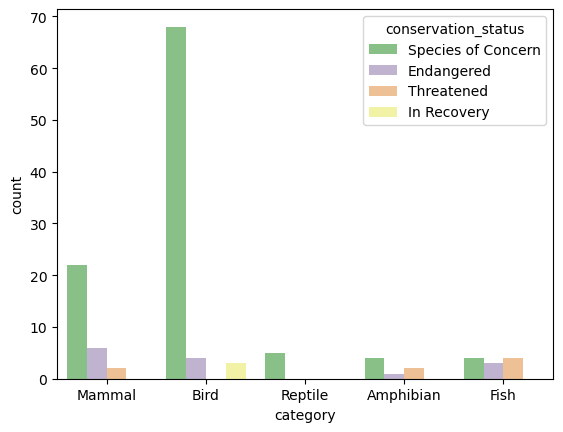

<Figure size 640x480 with 0 Axes>

In [22]:
sns.countplot(x='category', hue='conservation_status', data=animals, palette='Accent')
plt.show()
plt.clf()

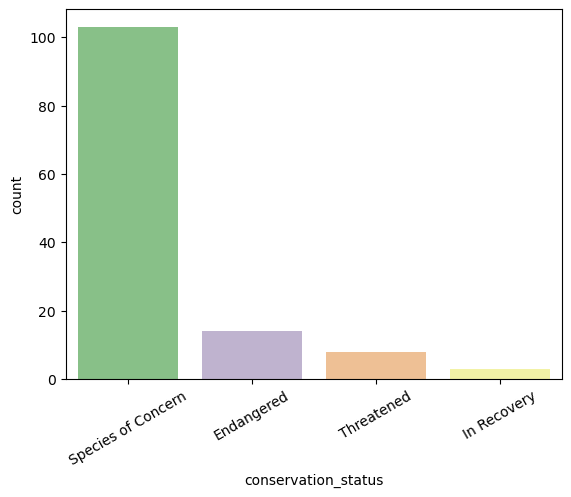

<Figure size 640x480 with 0 Axes>

In [23]:
sns.countplot(x='conservation_status', data=animals, palette='Accent')
plt.xticks(rotation=30)
plt.show()
plt.clf()

In [24]:
animals.conservation_status.value_counts(normalize=True, ascending=True)

In Recovery           0.023438
Threatened            0.062500
Endangered            0.109375
Species of Concern    0.804688
Name: conservation_status, dtype: float64

**1. What is the distribution of conservation_status for animals?**

Despite the lack of information for all species, we could observe:
- 80% of animals are species of concern
- 10% are endangered
- 6% are threatened
- Only 2% in recovery



### 2. Are certain types of species more likely to be endangered?

In [25]:
spec_endangered = spec[spec.conservation_status == 'Endangered']
spec_endangered.head()

,category,scientific_name,common_names,conservation_status
9,Mammal,Canis rufus,Red Wolf,Endangered
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
173,Bird,Grus americana,Whooping Crane,Endangered


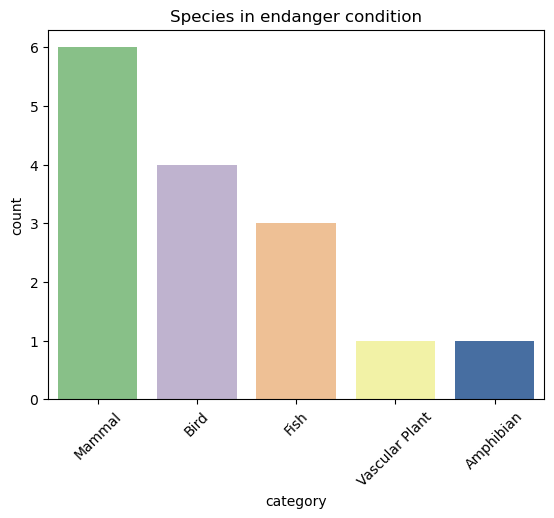

<Figure size 640x480 with 0 Axes>

In [26]:
sns.countplot(data=spec_endangered, x='category', palette='Accent')
plt.xticks(rotation=45)
plt.title('Species in endanger condition')
plt.show()
plt.clf()

In [27]:
spec_endangered.category.value_counts(normalize=True, ascending=False)

Mammal            0.400000
Bird              0.266667
Fish              0.200000
Vascular Plant    0.066667
Amphibian         0.066667
Name: category, dtype: float64

**2. Are certain types of species more likely to be endangered?**

Our observation, shows that mammals, fish and birds are the top 3 species in danger situation.
According the data:
- 4 out of 10 are mammals
- 2 out of 10 are bird and fish
- Vascular Plant and Anphibian respond for 6%

Two of all species observed are not in danger: reptile and nonvascular plants.

Let´s merge the dataframes.
@Maryam, I search for a method to merge, I think your hint to clean both of dataframes before merge could make sense. Let´s check it out!

In [28]:
# Merge the dataframes
species_df = spec.merge(obs, on='scientific_name')

In [29]:
# print the first few rows of the DataFrame
species_df.head(5)

# print the DataFrame's shape
species_df.shape

# print the DataFrame's data types and other info
species_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 22163
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             22164 non-null  object
 1   scientific_name      22164 non-null  object
 2   common_names         22164 non-null  object
 3   conservation_status  716 non-null    object
 4   park_name            22164 non-null  object
 5   observations         22164 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


### 3. Are the differences between species and their conservation status significant?

In [42]:
# Conservation status by category
species_df.head(10)

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128
5,Mammal,Bos bison,"American Bison, Bison",NaN,Yellowstone National Park,269
6,Mammal,Bos bison,"American Bison, Bison",NaN,Bryce National Park,68
7,Mammal,Bos bison,"American Bison, Bison",NaN,Great Smoky Mountains National Park,77
8,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,Bryce National Park,99
9,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,Yosemite National Park,124


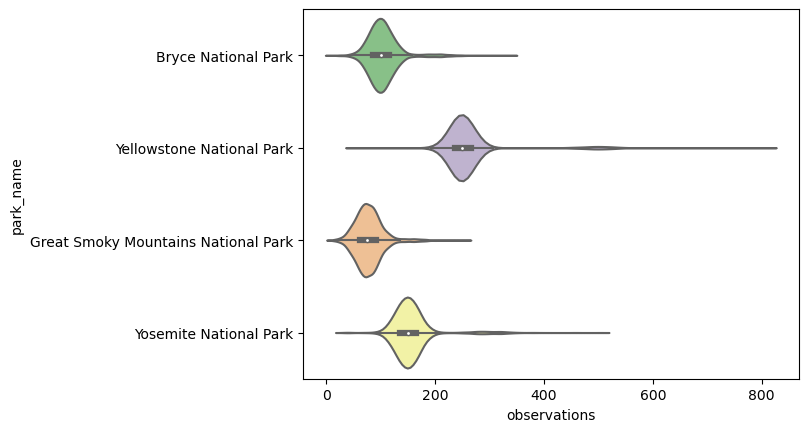

<Figure size 640x480 with 0 Axes>

In [52]:
sns.violinplot(x='observations', y='park_name', data=species_df, palette='Accent')
plt.xticks(rotation=0)
plt.show()
plt.clf()

Yellowstone have outliers, more than other parks. What kind of species are there?

In [56]:
yellowstone_park = species_df[species_df['park_name'] == 'Yellowstone National Park']

In [57]:
yellowstone_park.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
5,Mammal,Bos bison,"American Bison, Bison",NaN,Yellowstone National Park,269
10,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,Yellowstone National Park,235
15,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,Yellowstone National Park,221
17,Mammal,Canis latrans,Coyote,Species of Concern,Yellowstone National Park,206


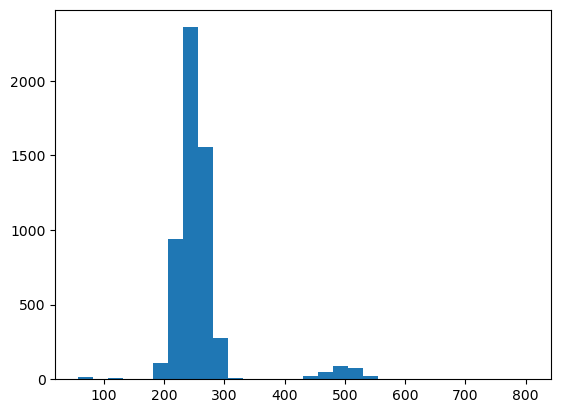

<Figure size 640x480 with 0 Axes>

In [65]:
plt.hist(x='observations', bins= 30, data=yellowstone_park)
plt.show()
plt.clf()

<AxesSubplot:>

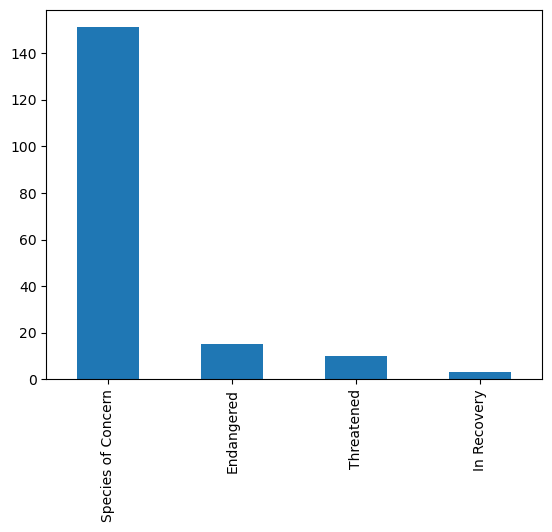

In [66]:
yellowstone_park['conservation_status'].value_counts().plot(kind='bar')

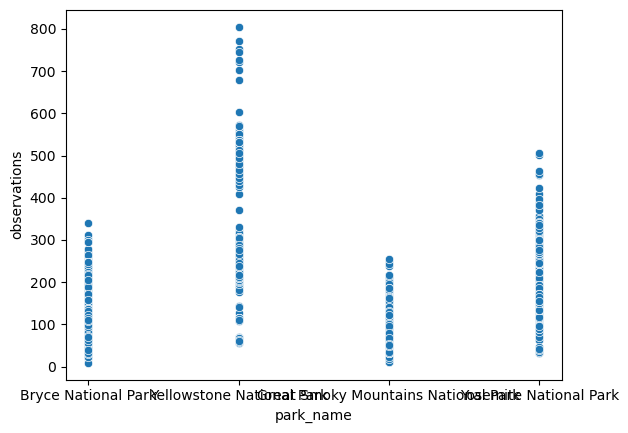

<Figure size 640x480 with 0 Axes>

In [54]:
sns.scatterplot(data=species_df, x='park_name', y='observations')
plt.show()
plt.clf()

###